# 0716230 陳子睿

## LINEAR REGRESSION

 ### 1. Data Generation 

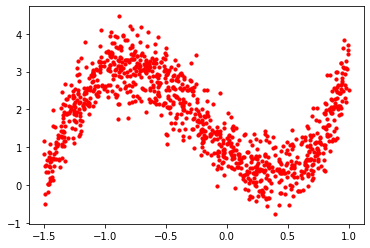

In [38]:
import random
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.uniform(-1.5, 1.0, 1000)
y = 3*pow(x,3) + 2*pow(x,2) - 3*x + 1 + np.random.normal(0, 0.5, 1000)
plt.scatter(x, y, color='red', s=10)   

* code explain

    * np.random.uniform(-1.5, 1.0, 1000) --> generate 1000 data randomly between \[-1.5,1.0\] <br>
    * next line generates 1000 data by the formula <br>  
    * np.random.normal(0, 0.5, 1000) generates 1000 normal distribution data randomly by specifying its mean and standard deviation <br>
    * the last line plots the distribution with color red

### 2. Data Preprocessing

In [39]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

x = x[:, np.newaxis]
y = y[:, np.newaxis]

# a 2d list 
xhead=[]

# four different K value
for degree in ([1, 2, 3, 4]):
   polynomial_features=PolynomialFeatures(degree=degree)
   xhead.append(polynomial_features.fit_transform(x))





* code explain

    * \[:, np.newaxis\] --> add a None column to x and y  <br>
    * xhead stores four different degree-K polynomial features <br> 
    * specifiy the degree of the polynomial_features <br>
    * polynomial_features can generate 1,ab,a^2,b^2 .... , and we add a none column to x so that when fitting the result will be 1, a, a^2, .....<br>
   

### 3.Model Construction

In [40]:
from sklearn.linear_model import LinearRegression
import operator

model = LinearRegression()
# !!!!!!!   fit and predict was write in 5. Result

* code explain

    * construct the linear regression model by sklearn  <br>
    * !!! fit and predict was write in 5. Result <br>

### 4. Validation

### 5. Results

weights =  [ 0.         -0.62212886]
weights =  [ 0.         -0.69367507 -0.15091934]
weights =  [ 0.         -2.98861688  2.08650302  3.00916277]
weights =  [ 0.         -3.10333891  1.90575267  3.19520008  0.18690132]


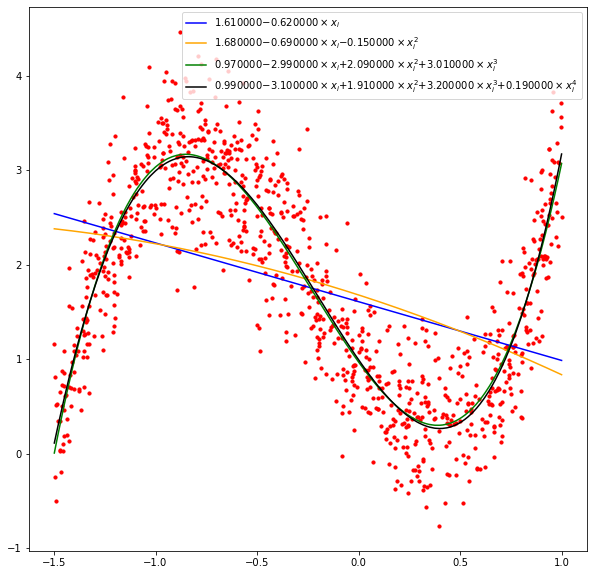

In [41]:
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

def draw_predict(x, y, x_poly, color):

    model.fit(x_poly, y)
    degree = len(model.coef_[0])-1
    y_poly_pred = model.predict(x_poly)
    # sort the values of x before line plot
    
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    ax = plt.gca()

    print("weights = ", model.coef_[0])

    if degree == 1:
        ax.plot(x, y_poly_pred, color=color, label=r'${%f} {%+f}\times x_{i}} $' %( round(model.intercept_[0],2) , round(model.coef_[0][1],2) ) )
    elif degree ==2:
        ax.plot(x, y_poly_pred, color=color, label=r'${%f} {%+f}\times x_{i} {%+f}\times x_{i}^2$' %( round(model.intercept_[0],2) , round(model.coef_[0][1],2) , round(model.coef_[0][2],2)  ))
    elif degree == 3:
        ax.plot(x, y_poly_pred, color=color, label=r'${%f} {%+f}\times x_{i} {%+f}\times x_{i}^2 {%+f}\times x_{i}^3$'%( round(model.intercept_[0],2) , round(model.coef_[0][1],2) , round(model.coef_[0][2],2) , round(model.coef_[0][3],2) ))
    elif degree == 4:
        ax.plot(x, y_poly_pred, color=color, label=r'${%f} {%+f}\times x_{i} {%+f}\times x_{i}^2 {%+f}\times x_{i}^3 {%+f}\times x_{i}^4$'%( round(model.intercept_[0],2) , round(model.coef_[0][1],2) , round(model.coef_[0][2],2) , round(model.coef_[0][3],2), round(model.coef_[0][4],2) ))
    ax.legend()



color = ['blue','orange','green','black']
for i in range (4):
    x_poly = xhead[i]
    draw_predict(x,y,x_poly,color[i])

plt.scatter(x, y, color='red', s=10)
plt.show()

* code explain
    * construct a function that will output all the answers and use for loop to execute it four times

    * model.fit(x_poly, y) --> fit the model by polynomial pass by xhead in the for loop
    * degree = len(model.coef_\[0\])-1 --> caculate the degree by the length of weight-1 <br>
    
    * sort_axis = operator.itemgetter(0)<br>
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)<br>
    x, y_poly_pred = zip(*sorted_zip)<br>
    --> sort the x value before plot
    
    * ax.plot(x, y_poly_pred, color=color, label=r'${%f} {%+f}\times xi $' %( round(model.intercept_\[0\],2) , round(model.coef_\[0\]\[1\],2) ) )
      
     --> plot the predict equations and the numerical equations on the picture by different degrees. <br>
    
    * The labels write the Legend equations in Latex formula with some limitations:
        * Use × instead of ∗ to represent multiplication operations by \times
        * Use xi instead of x by _{i}
        * Limit the floating-point numeric weights to be 2 decimal places  i.e. no 1.54323423456 but 1.54 by round( ,2)
        * There should be no redundant signs before weights, i.e no 1+−3.36×xi by {%+f}

## LOGISTIC REGRESSION

### 1. Data Generation

In [42]:

X = []
y = []
number_observation = 1000
for i in range (number_observation):
    mean = random.randint(0, 2) #  [0,2)
    y.append(mean)
    X.append(np.random.multivariate_normal([mean,mean],[[0.1,0.],[0,0.1]]))



* code explain
    * number_observation is the number of data
    * use for loop to run 1000 times and randomly choose y value <br>
    * use np.random.multivariate_normal(\[mean,mean\],\[\[0.1,0.\],\[0,0.1\]\]) to generate x (mean == y) <br>  
    * store mean and x in y and X every loop <br>

### 2. Model Construction

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,C=1e15)


* code explain

    * construct the logistic regression model by sklearn  <br>
    * fit_intercept means the formula will include constant number, c means inverse of regularization strength  <br>

### 3. Validation 

### 4. Results

accuracy =  0.988
yi= L( -9.265651888001493 + xi0 x 10.231854163380895 + xi1 x 8.33202521400672 )


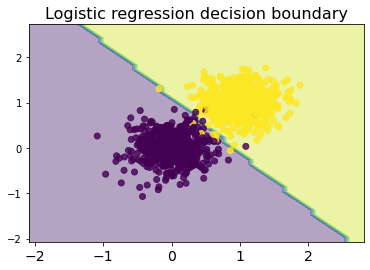

In [44]:
import matplotlib.pyplot as plt

def plot_decision_boundaries(X, y, model):
    
    reduced_data = X[:, :2]
    model.fit(reduced_data, y)
    print("accuracy = ",clf.score(reduced_data,y))
    print("yi= L(",clf.intercept_[0],"+ xi0 x",clf.coef_[0][0],"+ xi1 x",clf.coef_[0][1],")")
    h = .02

    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    #plt.xlabel("age",fontsize=15)
    #plt.ylabel("mother_education",fontsize=15)
    plt.xticks(fontsize=14)


X = np.array(X)
plt.figure()
plt.title("Logistic regression decision boundary",fontsize=16)
plot_decision_boundaries(X,y, clf)
plt.show()

* code explain
    * 
    ```
    def plot_decision_boundaries(X, y, model):
        
        reduced_data = X[:, :2] # Reduces to the first two columns of data (X already is two columns data)
        model.fit(reduced_data, y)  # fit the model

        print("accuracy = ",clf.score(reduced_data,y))  # print the accuracy of the model 
        print("yi= L(",clf.intercept_[0],"+ xi0 x",clf.coef_[0][0],"+ xi1 x",clf.coef_[0][1],")")   # print the model weights and corresponding terms
        
        # Step size of the mesh. Decrease to increase the quality of the VQ.
        h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

        # Plot the decision boundary. For that, we will assign a color to each
        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

        # Meshgrid creation
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Obtain labels for each point in mesh using the model.
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ```
